# Loading Dataset

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from custom_loader import AgeDBDataset, AgeDBHandler

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
dataset = AgeDBDataset(
    directory = 'AgeDB/',
    transform = ToTensor(),
    device = device,
)

# Dataset Attributes

In [4]:
len(dataset)

16488

In [5]:
dataset[0]

(tensor([[[0.4275, 0.4314, 0.4353,  ..., 0.4118, 0.4118, 0.4078],
          [0.4275, 0.4314, 0.4353,  ..., 0.4275, 0.4235, 0.4196],
          [0.4275, 0.4314, 0.4353,  ..., 0.4471, 0.4471, 0.4431],
          ...,
          [0.6667, 0.6706, 0.6745,  ..., 0.7333, 0.7333, 0.7333],
          [0.6706, 0.6745, 0.6784,  ..., 0.7176, 0.7176, 0.7176],
          [0.6745, 0.6784, 0.6824,  ..., 0.6980, 0.6980, 0.6980]],
 
         [[0.4275, 0.4314, 0.4353,  ..., 0.4039, 0.4039, 0.4000],
          [0.4275, 0.4314, 0.4353,  ..., 0.4196, 0.4157, 0.4118],
          [0.4275, 0.4314, 0.4353,  ..., 0.4392, 0.4392, 0.4353],
          ...,
          [0.6667, 0.6706, 0.6745,  ..., 0.7333, 0.7333, 0.7333],
          [0.6706, 0.6745, 0.6784,  ..., 0.7176, 0.7176, 0.7176],
          [0.6745, 0.6784, 0.6824,  ..., 0.6980, 0.6980, 0.6980]],
 
         [[0.3804, 0.3843, 0.3882,  ..., 0.3529, 0.3529, 0.3490],
          [0.3804, 0.3843, 0.3882,  ..., 0.3686, 0.3647, 0.3608],
          [0.3804, 0.3843, 0.3882,  ...,

In [6]:
type(dataset[0])

tuple

In [7]:
dataset.labels[0]

{'age': 35, 'gender': 1}

In [8]:
print(dataset.images[0])

AgeDB/0_MariaCallas_35_f.jpg


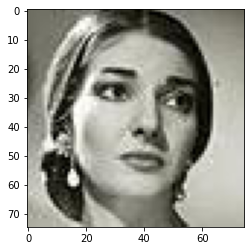

In [9]:
plt.figure()
plt.imshow(plt.imread(dataset.images[0]))

In [10]:
age = []
gender = []
for i in range(len(dataset)):
    age.append(dataset.labels[i]['age'])
    gender.append(dataset.labels[i]['gender'])

In [11]:
print("Highest Age Value: "+str(max(age))+"\nLowest Age Value: "+str(min(age)))

Highest Age Value: 101
Lowest Age Value: 1


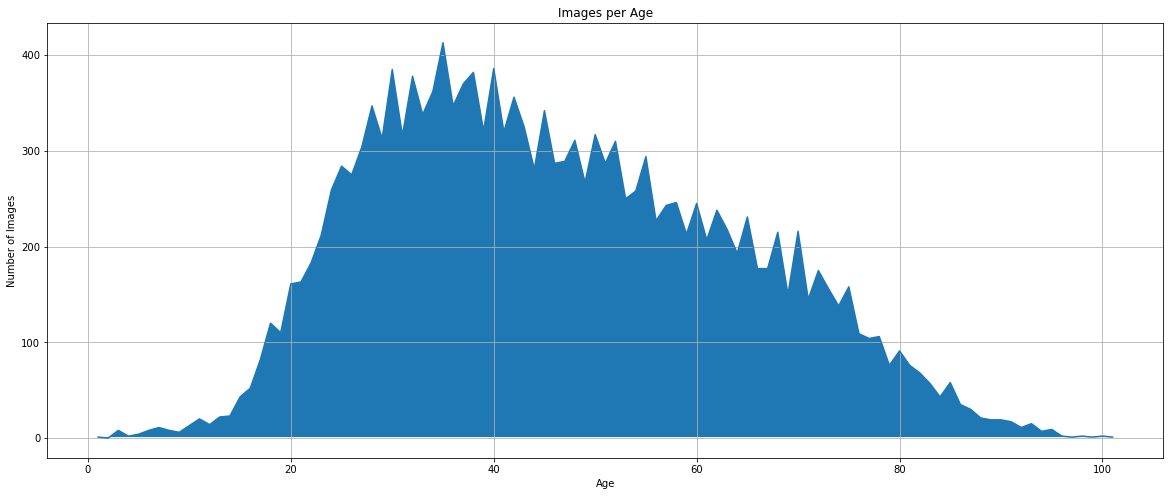

In [12]:
listofzeros = [0] * len(dataset)
same_age = [i for i in range(min(age), max(age) + 1)]
age_number = dict(zip(same_age, listofzeros))

for i in range(len(dataset)):
    if age[i] in age_number:
        age_number[age[i]] += 1

age_amount = age_number.items()
x, y = zip(*age_amount)

plt.figure(figsize= (20, 8))
plt.plot(x, y)
plt.fill(x, y)
plt.title("Images per Age")
plt.xlabel("Age")
plt.ylabel("Number of Images")
plt.grid()
plt.show()

# Split Dataset

In [13]:
# hyper params

In [14]:
train_set, validation_set, test_set = dataset.get_loaders(
    transform=ToTensor(),
    batch_size=1,
    train_size=0.7,
    test_size=0.2,
)

In [15]:
len(train_set), len(validation_set), len(test_set)

(11541, 1650, 3297)

# Train Model and Evaluate